# Tanzania Tourism Prediction
# By Mohamed Eltayeb

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix

import category_encoders as ce
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, mean_absolute_error

from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor

import warnings
warnings.filterwarnings('ignore')

# Read the training and testing data


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
ID = test_df['ID']

# Exploratory data analysis

# Features:

In [3]:
Features_Definitions = pd.read_csv("VariableDefinitions.csv")
Features_Definitions

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [4]:
train_df.shape

(4809, 23)

In [5]:
test_df.shape

(1601, 22)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [8]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [9]:
train_df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [10]:
test_df.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,1600.000000,1599.000000,1601.000000,1601.000000
mean,0.925625,1.056911,8.741412,2.495315
std,1.169807,1.309879,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,20.000000,40.000000,664.000000,174.000000


In [11]:
#The cardinality of each catgorical feature (Training)
cat_cols = list(train_df.select_dtypes(include=['object']).columns)
for col in cat_cols:
    print(col, train_df[col].nunique())

ID 4809
country 105
age_group 4
travel_with 5
purpose 7
main_activity 9
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
payment_mode 4
first_trip_tz 2
most_impressing 7


In [12]:
#The cardinality of each catgorical feature (Testing)
cat_cols = list(test_df.select_dtypes(include=['object']).columns)
for col in cat_cols:
  print(col, test_df[col].nunique())

ID 1601
country 87
age_group 4
travel_with 5
purpose 7
main_activity 9
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
payment_mode 4
first_trip_tz 2
most_impressing 7


# Visualizations

### Total_female --- Total_male

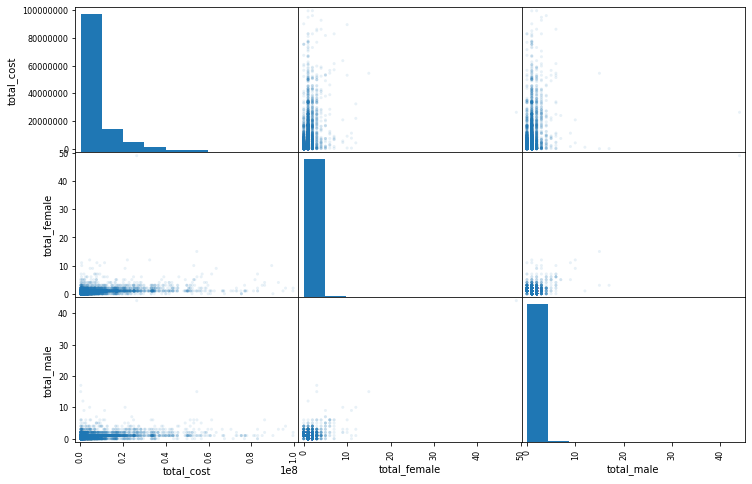

In [13]:
attributes = ["total_cost", "total_female", "total_male"]
scatter_matrix(train_df[attributes], figsize=(12, 8), alpha=0.1);

###### It looks like the less men and women go, the more money get spent.

### Night_mainland --- Night_zanzibar

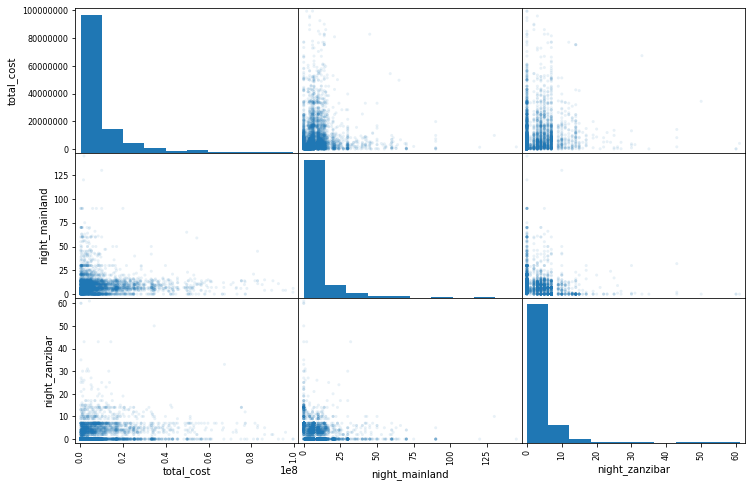

In [14]:
attributes = ["total_cost","night_mainland","night_zanzibar"]
scatter_matrix(train_df[attributes], figsize=(12, 8), alpha=0.1);

###### The same goes here. The less nights someone spend in either Tanzania or Zanzibar, the more money get spent. But also it seems that most of the tourists just spend less than 25 days in Tanzania and less than 10 days in Zanzibar.

### Age_group 

[]

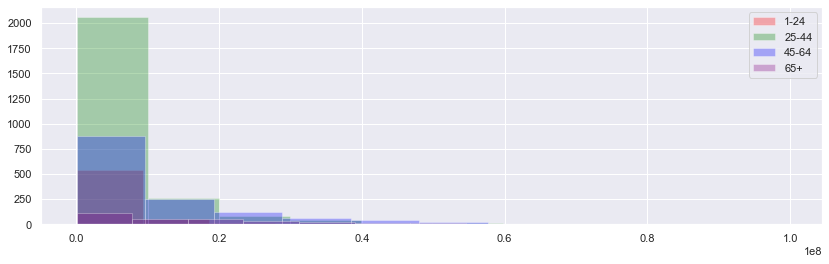

In [15]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 14, 4

sns.set()
plt.hist(train_df[train_df['age_group'] == '1-24'].total_cost, color='red', alpha = 0.3, label = '1-24')
plt.hist(train_df[train_df['age_group'] == '25-44'].total_cost, color='green', alpha=0.3, label = '25-44')
plt.hist(train_df[train_df['age_group'] == '45-64'].total_cost, color='blue', alpha=0.3, label = '45-64')
plt.hist(train_df[train_df['age_group'] == '65+'].total_cost, color='purple', alpha=0.3, label = '65+')
plt.legend()
plt.plot()

###### Those who are aged between 25 and 44 seem to constitute the major group with the highest costs.

### Tour_arrangement

[]

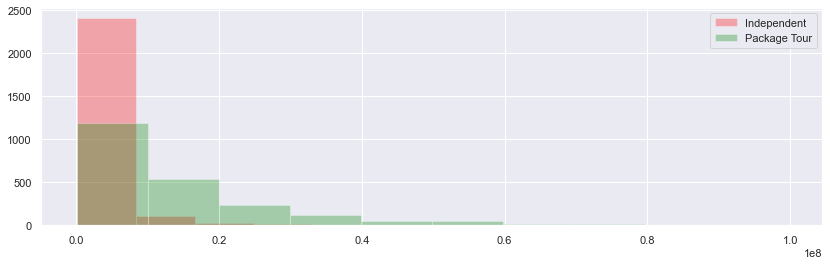

In [16]:
sns.set()
plt.hist(train_df[train_df['tour_arrangement'] == 'Independent'].total_cost, color='red', alpha = 0.3, label = 'Independent')
plt.hist(train_df[train_df['tour_arrangement'] == 'Package Tour'].total_cost, color='green', alpha=0.3, label = 'Package Tour')
plt.legend()
plt.plot()

###### Those who arranged their tour by themselves spent much more than those who come with a package tour. Surprisingly, almost all those who arranged their tour independently spent the double amount of money than others.

### travel_with

[]

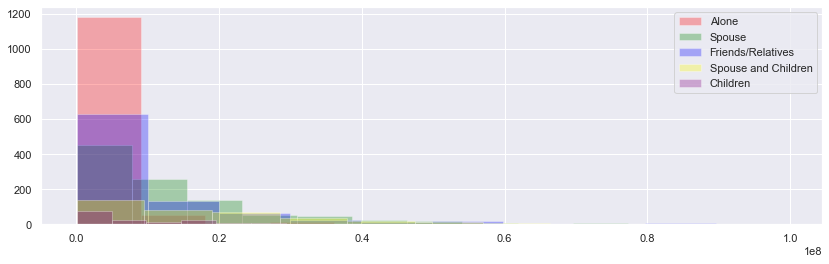

In [17]:
sns.set()
plt.hist(train_df[train_df['travel_with'] == 'Alone'].total_cost, color='red', alpha = 0.3, label = 'Alone')
plt.hist(train_df[train_df['travel_with'] == 'Spouse'].total_cost, color='green', alpha=0.3, label = 'Spouse')
plt.hist(train_df[train_df['travel_with'] == 'Friends/Relatives'].total_cost, color='blue', alpha=0.3, label = 'Friends/Relatives')
plt.hist(train_df[train_df['travel_with'] == 'Spouse and Children'].total_cost, color='yellow', alpha=0.3, label = 'Spouse and Children')
plt.hist(train_df[train_df['travel_with'] == 'Children'].total_cost, color='purple', alpha=0.3, label = 'Children')
plt.legend()
plt.plot()

###### Those who came alone spent much more than those who came along with anyone. Also, almost all those who came with their children spent very little amount of money than others, which is really strange as it is supposed to be the contrary. This may be due to the little amount of samples that represent this category

### Purpose

[]

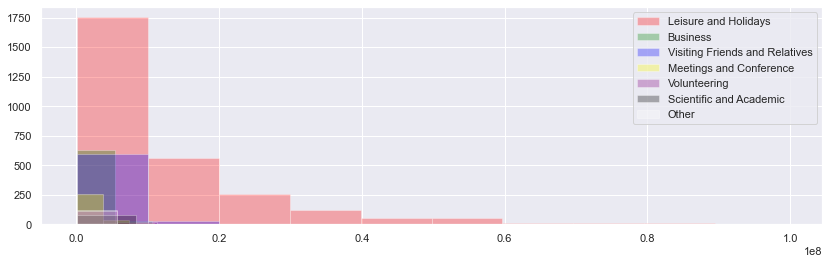

In [18]:
sns.set()
plt.hist(train_df[train_df['purpose'] == 'Leisure and Holidays'].total_cost, color='red', alpha = 0.3, label = 'Leisure and Holidays')
plt.hist(train_df[train_df['purpose'] == 'Business'].total_cost, color='green', alpha=0.3, label = 'Business')
plt.hist(train_df[train_df['purpose'] == 'Visiting Friends and Relatives'].total_cost, color='blue', alpha=0.3, label = 'Visiting Friends and Relatives')
plt.hist(train_df[train_df['purpose'] == 'Meetings and Conference'].total_cost, color='yellow', alpha=0.3, label = 'Meetings and Conference')
plt.hist(train_df[train_df['purpose'] == 'Volunteering'].total_cost, color='purple', alpha=0.3, label = 'Volunteering')
plt.hist(train_df[train_df['purpose'] == 'Scientific and Academic'].total_cost, color='black', alpha=0.3, label = 'Scientific and Academic')
plt.hist(train_df[train_df['purpose'] == 'Other'].total_cost, color='white', alpha=0.3, label = 'Other')
plt.legend()
plt.plot()

###### Nothing strange. Those who come for a hoilday usually spend too much money than others.

### Purpose --- Travel_with

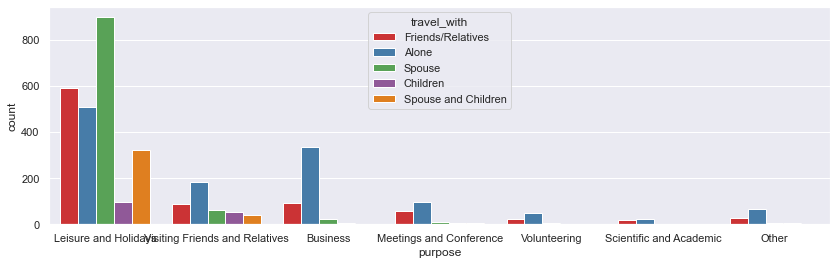

In [19]:

sns.countplot( x='purpose', data=train_df, hue="travel_with", palette="Set1");

### Tour_arrangement --- Travel_with

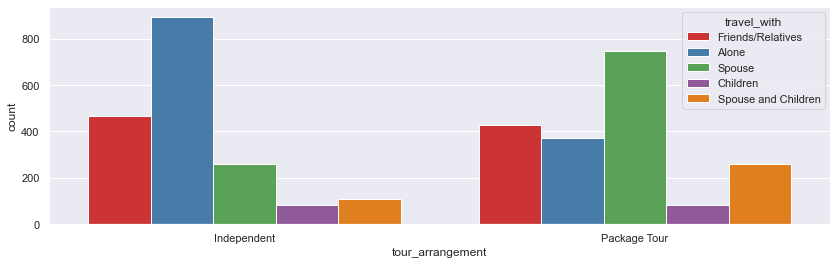

In [20]:
sns.countplot( x='tour_arrangement', data=train_df, hue="travel_with", palette="Set1");

###### Those who come with their families usually arrange their tour using a package.

# Data preprocessing

## Missing Values

In [21]:
#missing data percentage (Training)
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
travel_with,1114,23.2
most_impressing,313,6.5
total_male,5,0.1
total_female,3,0.1
ID,0,0.0
package_transport_tz,0,0.0
first_trip_tz,0,0.0
payment_mode,0,0.0
night_zanzibar,0,0.0
night_mainland,0,0.0


In [22]:
#missing data percentage (Testing)
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
travel_with,327,20.4
most_impressing,111,6.9
total_male,2,0.1
total_female,1,0.1
package_transport_tz,0,0.0
first_trip_tz,0,0.0
payment_mode,0,0.0
night_zanzibar,0,0.0
night_mainland,0,0.0
package_insurance,0,0.0


###### Firstly, we will fill the missing values in the two numerical features with the median

In [23]:
for f in ['total_male','total_female']:
    median = train_df[f].median()
    for dataset in (train_df,test_df):
        dataset[f] = dataset[f].fillna(median) 

###### For the 'most_impressing' feature, we will replace missing values with the mode.

In [24]:
mode = train_df['most_impressing'].mode()
for dataset in (train_df,test_df):
    dataset['most_impressing'] = dataset['most_impressing'].fillna(mode[0]) 

###### For the 'travel_with' feature, we will do as follows:
###### - If the sum of 'total_male' and 'total_female' equals one, we will give them 'Alone'
###### - If  'total_male' equals one and 'total_female' equals one, we will give them 'Spouse'
###### - Otherwise, we will give them 'Friends/Relatives'

In [25]:
for dataset in (train_df,test_df):
    for i in range(0,dataset.shape[0]):
        if ((dataset['total_male'][i]+dataset['total_female'][i]) == 1.0) and \
            (pd.isnull(dataset['travel_with'][i])):
            dataset['travel_with'][i] = 'Alone'
        elif ((dataset['total_male'][i]==1.0) and (dataset['total_female'][i]==1.0) and \
            (pd.isnull(dataset['travel_with'][i]))):
            dataset['travel_with'][i] = 'Spouse'
        

#For other samples:
for dataset in (train_df,test_df):
    dataset['travel_with'] = dataset['travel_with'].fillna('Friends/Relatives') 

# Feature Engineering

###### We will firstly drop "ID" column

In [26]:
for dataset in (train_df,test_df):
    dataset.drop('ID',axis=1,inplace=True)

###### We can Add 'total_male' and 'total_female' to give us the number of tourists

In [27]:
for dataset in (train_df,test_df):
    dataset['tourists'] = dataset['total_male'] + dataset['total_female']

###### We can add all the packages features to get a full tour feature

In [28]:
#Transform them to boolean
features = ['package_transport_int','package_accomodation','package_food',
            'package_transport_tz','package_sightseeing','package_guided_tour','package_insurance']
for dataset in (train_df,test_df):
    for feature in features:
        dataset[feature] = dataset[feature] == 'Yes'

#Add them together
for dataset in (train_df,test_df):
    dataset['full_tour'] = dataset['package_transport_int'] & dataset['package_accomodation'] & \
                           dataset['package_food'] & dataset['package_transport_tz'] & \
                           dataset['package_sightseeing'] & dataset['package_guided_tour'] & \
                           dataset['package_insurance']

# Outliers

### Get rid of outliers

In [29]:
#The Numerical Features
feats = list(train_df.select_dtypes(include=['int64', 'float64', 'int32']).columns)
del feats[4]

#Calculate Z-Scores
z_scores = stats.zscore(train_df[feats])
absolute_z_score = np.abs(z_scores)

#The threshold
is_outlier = absolute_z_score >= 7

for feat in range(0,len(feats)):
    for x in train_df.index:
        if (is_outlier[x][feat] == True ):
            train_df.drop(axis=0, index=x,inplace=True)
            is_outlier[x] = np.zeros((5,)) 

# Encoding

### Target Encoding for all the categorical features

In [30]:
def target_enc(train_df, test_df, features):
    targ_enc = ce.TargetEncoder(cols=features)
    targ_enc.fit(train_df[features], train_df['total_cost'])
    
    train_df = train_df.join(targ_enc.transform(train_df[features]).add_suffix('_targ'))
    test_df = test_df.join(targ_enc.transform(test_df[features]).add_suffix('_targ'))
    
    train_df = train_df.drop(features, axis=1)
    test_df = test_df.drop(features, axis=1)
    
    return train_df, test_df

cat_features = list(train_df.select_dtypes(include=['object','bool']).columns)
train_df, test_df = target_enc(train_df,test_df,cat_features)

# ML Modeling

<AxesSubplot:>

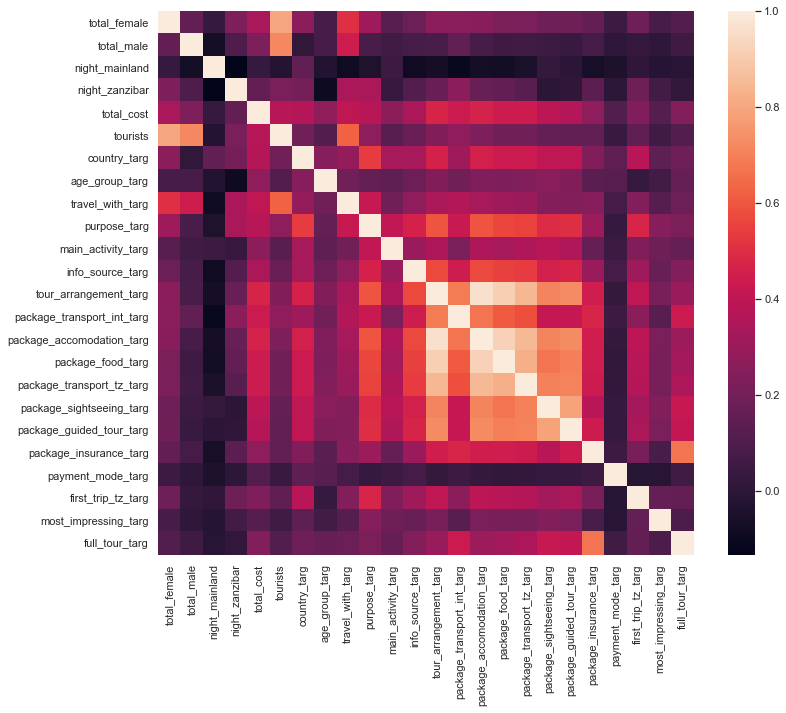

In [31]:
rcParams["figure.figsize"] = 12, 10
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix)

## Evaluating on the test set

In [32]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(train_df, train_df["tour_arrangement_targ"]):
    strat_train_set = train_df.iloc[train_index]
    strat_test_set = train_df.iloc[test_index]

X_Train = strat_train_set.drop('total_cost',axis=1)
y_Train = strat_train_set['total_cost']
X_Test = strat_test_set.drop('total_cost',axis=1)
y_Test = strat_test_set['total_cost']

In [33]:
params = {'n_estimators': 98, 'max_depth': 7, 'reg_lambda': 0.404270438125327, 
          'feature_fraction': 0.4070603716589727, 'num_leaves': 10, 
          'subsample': 0.6371374374613842
         }
lgbm = LGBMRegressor(**params)

In [34]:
bag_reg = BaggingRegressor(lgbm, n_estimators=50, max_samples=3000, bootstrap=True, n_jobs=-1, random_state=0)
bag_reg.fit(X_Train,y_Train)
y_pred = bag_reg.predict(X_Test)
mean_absolute_error(y_pred,y_Test)

4864848.487826128

## Final Submission

In [35]:
X = train_df.drop('total_cost',axis=1)
y = train_df['total_cost']

In [36]:
bag_reg.fit(X, y)
test_df['total_cost'] = bag_reg.predict(test_df)
submission = pd.DataFrame({"ID": ID ,"total_cost": test_df.total_cost})
submission.to_csv('TanzaniaTourism.csv',index=False)

# Leaderboard MAE = 4971847.829238593